In [333]:
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.2


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [334]:
import numpy as np
import pandas as pd

### Carregando os dados

In [335]:
def carregar_dados():
    caminho = r"C:\Users\MASTER\Documents\victor\predictive_maintenance\Predictive Maintenance Dataset\ai4i2020.csv"
    data = pd.read_csv(caminho)
    return data

data = carregar_dados()


In [336]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Limpeza do dataset

In [337]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [338]:
# Diferença de temperatura -> Nova coluna

data['Temp Diff'] = data['Process temperature [K]'] - data['Air temperature [K]']

# Remover colunas

data.drop(columns=['UDI','Product ID'],axis=1,inplace=True)
data.drop(columns=['TWF','HDF','PWF','OSF','RNF'],inplace=True)

In [339]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
data['Type'] = LabelEncoder().fit_transform(data['Type'])

In [340]:
# StandardScaler

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = pd.DataFrame(scale.fit_transform(data),columns = data.columns,index = data.index)

### Visualização dos dados

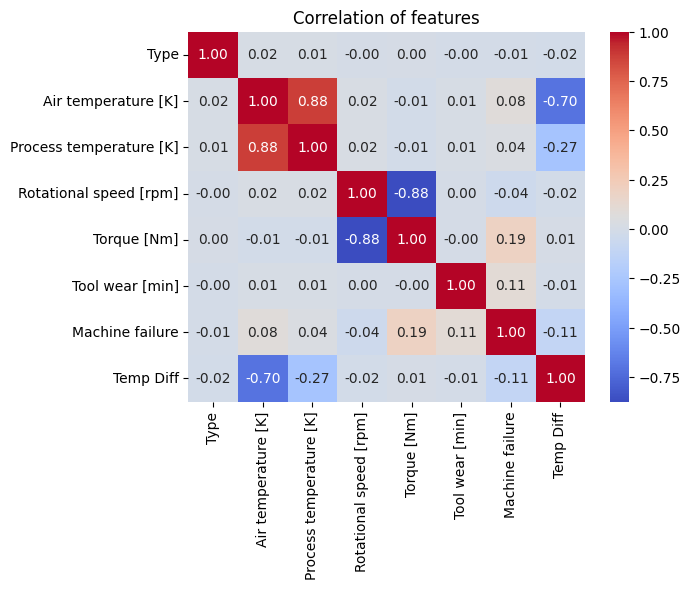

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.Figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation of features")
plt.show()

In [342]:
# Variáveis de entrada (features)
X = data[['Air temperature [K]','Process temperature [K]','Type','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Temp Diff']]

# Variável que o modelo precisa prever (target)
y = data['Machine failure']


In [343]:
# Limpart os nomes das colunas
# Algumas bibliotecas podem dar erro ou se comportar mal com colunas contendo [] <>

X.columns = X.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)

In [344]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp Diff
0,1.333889,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322,0.498849
1,-0.332223,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,0.498849
2,-0.332223,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,0.398954
3,-0.332223,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,0.398954
4,-0.332223,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,0.498849
...,...,...,...,...,...,...,...,...
9995,1.333889,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.187322,-0.400212
9996,-1.998335,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.187322,-0.500108
9997,1.333889,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.187322,-0.400212
9998,-1.998335,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.187322,-0.300317


In [345]:
X

,Air temperature K,Process temperature K,Type,Rotational speed rpm,Torque Nm,Tool wear min,Temp Diff
0,-0.952389,-0.947360,1.333889,0.068185,0.282200,-1.695984,0.498849
1,-0.902393,-0.879959,-0.332223,-0.729472,0.633308,-1.648852,0.498849
2,-0.952389,-1.014761,-0.332223,-0.227450,0.944290,-1.617430,0.398954
3,-0.902393,-0.947360,-0.332223,-0.590021,-0.048845,-1.586009,0.398954
4,-0.902393,-0.879959,-0.332223,-0.729472,0.001313,-1.554588,0.498849
...,...,...,...,...,...,...,...
9995,-0.602417,-1.082162,1.333889,0.363820,-1.052012,-1.476034,-0.400212
9996,-0.552421,-1.082162,-1.998335,0.520005,-0.821283,-1.428902,-0.500108
9997,-0.502425,-0.947360,1.333889,0.592519,-0.660777,-1.350349,-0.400212
9998,-0.502425,-0.879959,-1.998335,-0.729472,0.854005,-1.303217,-0.300317


Estrutura antes de escalar


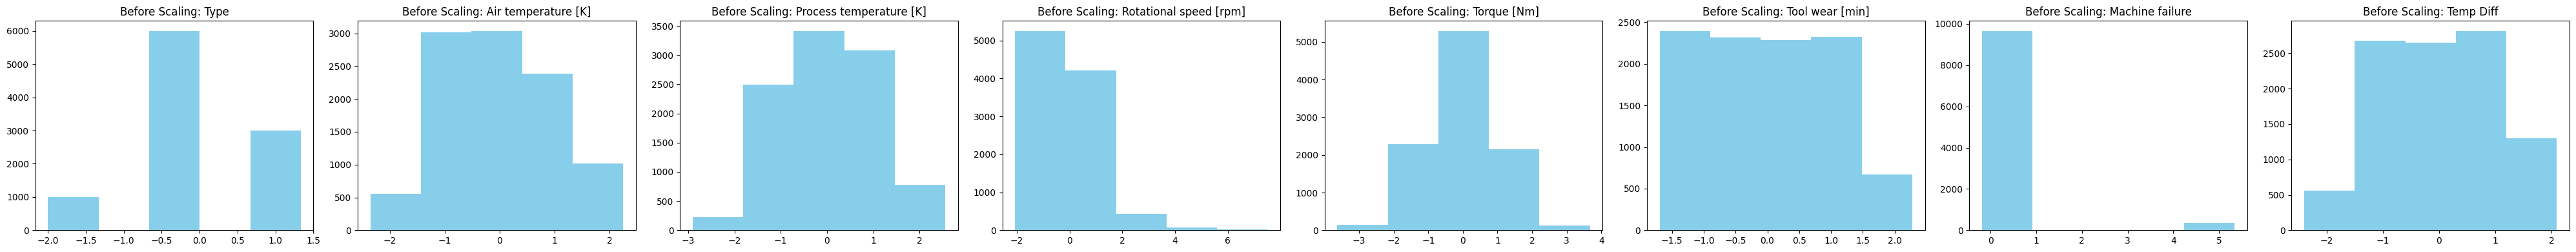

- - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Estrutura depois de escalar


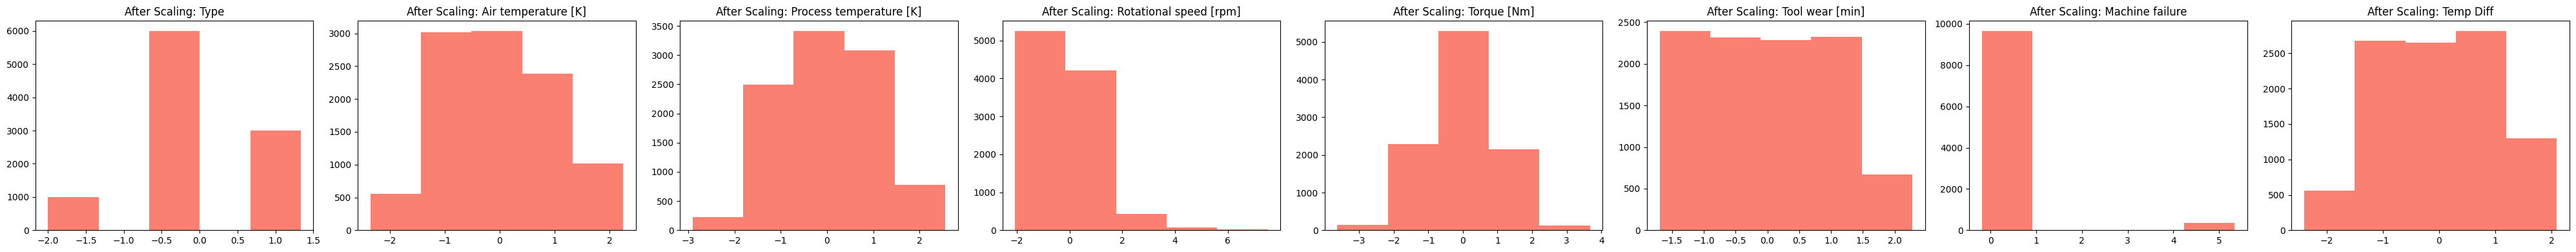

In [346]:
# plotting graphs before and after the standardizations
print("Estrutura antes de escalar")
num_cols = len(data.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))
if num_cols == 1:
    axes = [axes]

for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=5, color='skyblue')
    axes[i].set_title(f'Before Scaling: {col}')
plt.tight_layout()
plt.show()

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)
df_scaled = pd.DataFrame(scaled_array, columns=data.columns)

print("Estrutura depois de escalar")
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))
if num_cols == 1:
    axes = [axes]

for i, col in enumerate(df_scaled.columns):
    axes[i].hist(df_scaled[col], bins=5, color='salmon')
    axes[i].set_title(f'After Scaling: {col}')
plt.tight_layout()
plt.show()

In [347]:
# Verificar a contagem das classes alvo

from collections import Counter
count = Counter(y)
print(count)

# Classe 0 (normal) -> 9661 // Classe 1 (falha) -> 339

Counter({-0.18732200950448585: 9661, 5.338400984728135: 339})


In [348]:
y.unique()
y.dtype


dtype('float64')

In [349]:
y = data['Machine failure'].round().astype(int)

In [350]:
y.unique()
y.dtype


dtype('int64')

In [351]:
'''
SMOTE (Synthetic Minority Over-sampling Technique) 

Técnica que cria amostras sintéticas da classe minoritária usando interpolação entre vizinhos próximos

Em vez de copiar registro ele gera novos pontos no espaço das features
'''

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
y_resampled.shape

(19322,)

In [352]:
from collections import Counter
counts = Counter(y_resampled)
print("Dados balanceados! ",counts)

Dados balanceados!  Counter({0: 9661, 5: 9661})


### Treinando o modelo

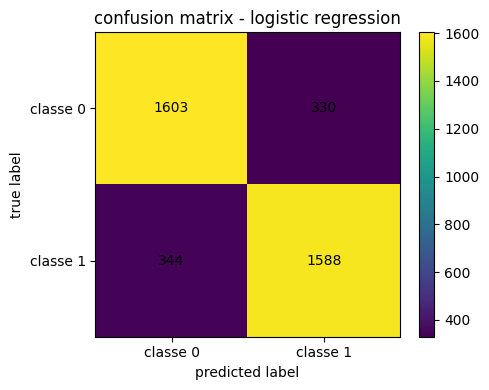

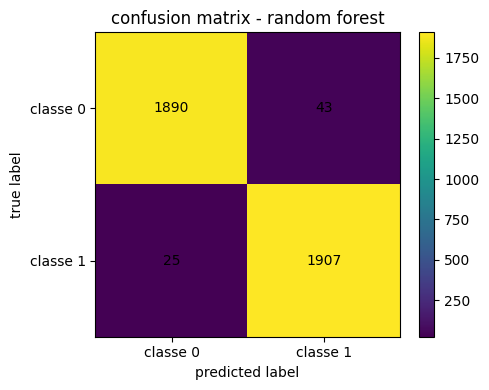

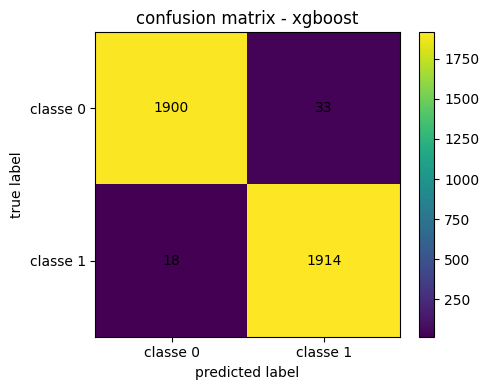

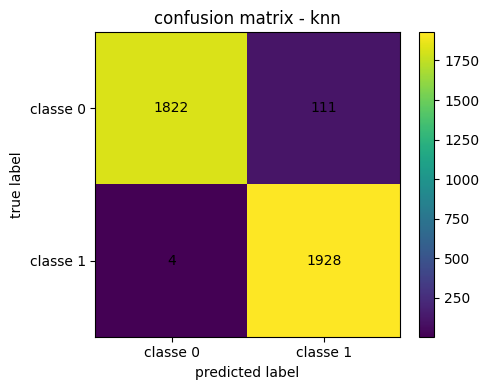

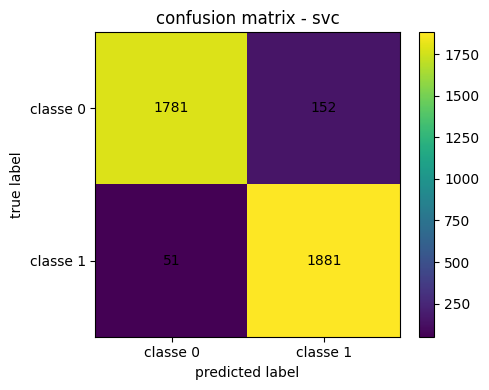

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from imblearn.over_sampling import SMOTE

import joblib
import os



# corrigir target antes de tudo
y = y.map({0: 0, 5: 1}).astype(int)

# aplicar smote depois do ajuste
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


def split_data(X, y):
    return train_test_split(
        X,
        y,
        test_size=0.2,
        stratify=y,
        random_state=42
    )


def get_models():
    return {
        "logistic regression": LogisticRegression(
            C=1.0,
            penalty="l2",
            solver="liblinear",
            max_iter=500
        ),
        "random forest": RandomForestClassifier(random_state=42),
        "xgboost": XGBClassifier(
            eval_metric="logloss",
            random_state=42
        ),
        "knn": KNeighborsClassifier(),
        "svc": SVC()
    }


def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"confusion matrix - {model_name}")
    plt.colorbar()

    ticks = np.arange(2)
    plt.xticks(ticks, ["classe 0", "classe 1"])
    plt.yticks(ticks, ["classe 0", "classe 1"])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j,
                i,
                cm[i, j],
                ha="center",
                va="center"
            )

    plt.xlabel("predicted label")
    plt.ylabel("true label")
    plt.tight_layout()
    plt.show()


def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    metrics_summary = {}
    reports = {}
    confusion_matrices = {}
    trained_models = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # salvar modelo treinado em memoria
        trained_models[name] = model

        # metricas simples
        metrics_summary[name] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "f1 score": f1_score(y_test, y_pred)
        }

        # classification report como dataframe
        report_dict = classification_report(
            y_test,
            y_pred,
            target_names=["classe 0", "classe 1"],
            output_dict=True
        )
        report_df = pd.DataFrame(report_dict).T
        reports[name] = report_df

        # matriz de confusao
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm

        # grafico da matriz de confusao
        plot_confusion_matrix(cm, name)

    return metrics_summary, reports, confusion_matrices, trained_models



# split
X_train, X_test, y_train, y_test = split_data(X_resampled, y_resampled)

# modelos
models = get_models()

# treino e avaliacao
metrics_summary, reports, confusion_matrices, trained_models = train_and_evaluate(
    models,
    X_train,
    X_test,
    y_train,
    y_test
)



In [354]:
comparison_df = pd.DataFrame(metrics_summary).T
print(comparison_df)


                     accuracy  f1 score
logistic regression  0.825614  0.824935
random forest        0.982406  0.982483
xgboost              0.986805  0.986852
knn                  0.970246  0.971040
svc                  0.947477  0.948802


In [355]:
#print(confusion_matrices["svc"])

In [356]:
print(reports["logistic regression"])

              precision    recall  f1-score      support
classe 0       0.823318  0.829281  0.826289  1933.000000
classe 1       0.827946  0.821946  0.824935  1932.000000
accuracy       0.825614  0.825614  0.825614     0.825614
macro avg      0.825632  0.825614  0.825612  3865.000000
weighted avg   0.825631  0.825614  0.825612  3865.000000


In [357]:
print(reports["random forest"])

              precision    recall  f1-score      support
classe 0       0.986945  0.977755  0.982328  1933.000000
classe 1       0.977949  0.987060  0.982483  1932.000000
accuracy       0.982406  0.982406  0.982406     0.982406
macro avg      0.982447  0.982407  0.982406  3865.000000
weighted avg   0.982448  0.982406  0.982406  3865.000000


In [358]:
print(reports["xgboost"])


              precision    recall  f1-score      support
classe 0       0.990615  0.982928  0.986757  1933.000000
classe 1       0.983051  0.990683  0.986852  1932.000000
accuracy       0.986805  0.986805  0.986805     0.986805
macro avg      0.986833  0.986806  0.986804  3865.000000
weighted avg   0.986834  0.986805  0.986804  3865.000000


In [359]:
print(reports["knn"])


              precision    recall  f1-score      support
classe 0       0.997809  0.942576  0.969407  1933.000000
classe 1       0.945562  0.997930  0.971040  1932.000000
accuracy       0.970246  0.970246  0.970246     0.970246
macro avg      0.971685  0.970253  0.970223  3865.000000
weighted avg   0.971692  0.970246  0.970223  3865.000000


In [360]:
print(reports["svc"])

              precision    recall  f1-score      support
classe 0       0.972162  0.921366  0.946082  1933.000000
classe 1       0.925234  0.973602  0.948802  1932.000000
accuracy       0.947477  0.947477  0.947477     0.947477
macro avg      0.948698  0.947484  0.947442  3865.000000
weighted avg   0.948704  0.947477  0.947442  3865.000000


In [361]:
import os
import joblib


def save_models_separately(trained_models, folder="saved_models"):
    os.makedirs(folder, exist_ok=True)

    for model_name, model in trained_models.items():
        file_name = model_name.replace(" ", "_") + ".pkl"
        file_path = os.path.join(folder, file_name)
        joblib.dump(model, file_path)


save_models_separately(trained_models)


In [362]:
'''

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier

import joblib


def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        stratify=y,
        random_state=random_state
    )
    return X_train, X_test, y_train, y_test


def build_xgboost_model():
    model = XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    )
    return model


def train_model(X_train, y_train):
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("model", build_xgboost_model())
    ])

    pipeline.fit(X_train, y_train)
    return pipeline


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("accuracy:", acc)
    print()

    print("classification report:")
    print(classification_report(y_test, y_pred))
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("confusion matrix:")
    print(cm)

    return y_pred, cm


def save_model(model, path="xgboost_machine_failure.pkl"):
    joblib.dump(model, path)


# ajuste do target para binario correto
y = y.map({0: 0, 5: 1}).astype(int)

# split
X_train, X_test, y_train, y_test = split_data(X, y)

# treino
xgb_pipeline = train_model(X_train, y_train)

# avaliacao
y_pred, cm = evaluate_model(xgb_pipeline, X_test, y_test)

# salvar modelo
save_model(xgb_pipeline)

'''


'\n\nimport numpy as np\nimport pandas as pd\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.pipeline import Pipeline\n\nfrom xgboost import XGBClassifier\n\nimport joblib\n\n\ndef split_data(X, y, test_size=0.2, random_state=42):\n    X_train, X_test, y_train, y_test = train_test_split(\n        X,\n        y,\n        test_size=test_size,\n        stratify=y,\n        random_state=random_state\n    )\n    return X_train, X_test, y_train, y_test\n\n\ndef build_xgboost_model():\n    model = XGBClassifier(\n        n_estimators=300,\n        max_depth=6,\n        learning_rate=0.05,\n        subsample=0.8,\n        colsample_bytree=0.8,\n        objective="binary:logistic",\n        eval_metric="logloss",\n        random_state=42\n    )\n    return model\n\n\ndef train_model(X_train, y_tr